# __Predicting Airbnb Listing Prices in Sydney__

---

## Task 1: Exploratory Data Analysis

Before carrying out initial data analysis methods, `Problem Description` with key points is provided as the firt step using the following headings:
- Forecasting Problem
- Evaluation Criteria
- Types of Variables/Features
- Data summary and main data characteristics
- Missing Values (only explain what you found at this stage)
    


In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from pandas_profiling import ProfileReport
from ipywidgets import interact, Dropdown, FloatSlider
from scipy.stats import zscore

C:\Users\haiho\AppData\Local\Temp\ipykernel_26012\2550282417.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Configure seaborn aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [ ]:
# Load the DataFrames
df_train = pd.read_csv(r"C:\Users\haiho\GITHUB\Sydney-Airbnb-prices-prediction\data\raw\train.csv", parse_dates=["host_since", "first_review", "last_review"])
df_test = pd.read_csv(r"C:\Users\haiho\GITHUB\Sydney-Airbnb-prices-prediction\data\raw\test.csv", parse_dates=["host_since", "first_review", "last_review"])

### 1. Basic Info & Structure 

In [5]:
# Info about the df_train DataFrame
print("\n📌 Dataset Info:")
print(df_train.info())


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   ID                                            7000 non-null   int64         
 1   name                                          6999 non-null   object        
 2   description                                   6935 non-null   object        
 3   neighborhood_overview                         5183 non-null   object        
 4   host_name                                     7000 non-null   object        
 5   host_since                                    7000 non-null   datetime64[ns]
 6   host_location                                 6998 non-null   object        
 7   host_about                                    4542 non-null   object        
 8   host_response_time                            6355 

In [8]:
print("\n📌 First 5 Rows:")
display(df_train.head())


📌 First 5 Rows:


,ID,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,0,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,Heidi,2009-11-20,"Sydney, New South Wales, Australia",I am a Canadian who has made Australia her hom...,within a few hours,100%,69%,t,Balgowlah,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Balgowlah, New South Wales, Australia",Manly,-33.80084,151.26378,Entire residential home,Entire home/apt,6,3 baths,3.0,3.0,"[""Hot water"", ""Coffee maker"", ""Heating"", ""Hair...",2,22,2.0,2.0,22.0,22.0,2.0,22.0,t,0,14,14,174.0,3,1,0,2016-01-02,2021-06-01,4.67,4.33,4.33,4.67,4.33,4.67,4.33,Exempt,f,2,2,0,0,0.04,$470.00
1,1,Unique Designer Rooftop Apartment in City Loca...,Penthouse living at it best ... You will be st...,The location is really central and there is nu...,Morag,2009-12-03,"Sydney, New South Wales, Australia",I am originally Scottish but I have made Sydne...,within an hour,100%,100%,f,Darlinghurst,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Darlinghurst, New South Wales, Australia",Sydney,-33.87964,151.21680,Private room in rental unit,Private room,2,1 private bath,1.0,1.0,"[""Hot water"", ""Coffee maker"", ""Long term stays...",2,90,2.0,2.0,90.0,90.0,2.0,90.0,t,5,31,61,336.0,383,18,6,2012-02-23,2021-12-03,4.42,4.58,4.40,4.77,4.67,4.70,4.47,PID-STRA-24061-7,t,1,0,1,0,3.21,$82.00
2,2,"Studio Yindi @ Mosman, Sydney","An open plan apartment, which opens onto a spa...","Mosman is a smart, middle to upper class subur...",John,2010-11-06,"Sydney, New South Wales, Australia",Faber est suae quisquae fortunae\r\n\r\nWe bec...,within a few hours,100%,81%,t,Mosman,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Mosman, New South Wales, Australia",Mosman,-33.81748,151.23484,Entire guest suite,Entire home/apt,4,1 bath,1.0,1.0,"[""Hot water"", ""Coffee maker"", ""Long term stays...",2,90,2.0,2.0,90.0,90.0,2.0,90.0,t,1,9,33,217.0,297,15,4,2010-12-29,2021-11-30,4.55,4.66,4.23,4.87,4.90,4.73,4.68,PID-STRA-6093,f,1,1,0,0,2.23,$150.00
3,3,"2br Eclectic Stylish Home, 2 mins to Bondi Beach","Two blocks to the beach, surf and coffee. Larg...",3 minutes to the beach and cafes. 5 minutes t...,Eilish,2010-11-25,"Bondi Beach, New South Wales, Australia","I'm a designer. I have lived in many cities, c...",within a day,100%,100%,t,Bondi Beach,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Bondi Beach, New South Wales, Australia",Waverley,-33.88905,151.27653,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Hot water"", ""Coffee maker"", ""Long term stays...",90,90,90.0,90.0,90.0,90.0,90.0,90.0,t,12,42,72,347.0,33,1,0,2011-04-09,2021-04-07,4.42,4.42,3.74,4.90,4.90,4.90,4.32,NaN,f,1,1,0,0,0.25,$245.00
4,4,A little bit of Sydney - Australia,"Hello Everyone,<br /><br />We have a quiet are...",NaN,Bryan,2011-01-03,"Sydney, New South Wales, Australia",We are living in Sydney. We like

In [9]:
# Info about the df_train DataFrame
print("\n📌 Dataset Info:")
print(df_test.info())


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   ID                                            3000 non-null   int64         
 1   name                                          2999 non-null   object        
 2   description                                   2911 non-null   object        
 3   neighborhood_overview                         1760 non-null   object        
 4   host_name                                     3000 non-null   object        
 5   host_since                                    3000 non-null   datetime64[ns]
 6   host_location                                 2998 non-null   object        
 7   host_about                                    1568 non-null   object        
 8   host_response_time                            466 n

In [10]:
print("\n📌 First 5 Rows:")
display(df_test.head())


📌 First 5 Rows:


,ID,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7000,Sweet dream come true*,Nordic style warm colour light to make you rel...,Located at Ryde near Meadowbank.13 mins for wa...,Vanessa,2016-07-05,"Ryde, New South Wales, Australia",NaN,NaN,NaN,NaN,t,NaN,1.0,"['phone', 'jumio', 'offline_government_id', 's...",t,t,"Ryde, New South Wales, Australia",Ryde,-33.81917,151.09689,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Hot water"", ""Long term stays allowed"", ""Heat...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,30,0,0,2019-08-01,2019-12-10,4.87,4.87,4.73,4.97,4.93,4.80,4.93,NaN,t,1,0,1,0,1.05
1,7001,Huge self contained studio,It is a huge studio. Self contained which <br ...,NaN,J,2016-11-24,AU,NaN,NaN,NaN,NaN,f,NaN,1.0,['phone'],t,f,NaN,The Hills Shire,-33.74884,151.03992,Entire guest suite,Entire home/apt,2,1 bath,1.0,2.0,"[""Free street parking"", ""TV"", ""Hot water"", ""Lo...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,1,0,0,2017-12-18,2017-12-18,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,0.02
2,7002,2 Bedroom Tranquility/Luxury 3xSecure Car Par...,On the Border of Wolli Creek<br />Luxury along...,Our neighbors are great and very sociable peo...,Ozbay,2018-12-26,AU,NaN,NaN,NaN,NaN,f,NaN,1.0,"['phone', 'jumio', 'offline_government_id', 's...",t,t,"Arncliffe, New South Wales, Australia",Rockdale,-33.93715,151.15122,Entire residential home,Entire home/apt,4,1 bath,2.0,2.0,"[""Hot water"", ""Long term stays allowed"", ""Heat...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,11,0,0,2019-12-18,2020-10-01,4.86,5.00,5.00,5.00,5.00,4.86,5.00,NaN,f,1,1,0,0,0.46
3,7003,Massive bright beachside room (entire top floor),Beautiful bright very large room on top floor ...,NaN,Hannah,2017-09-28,Australia,NaN,NaN,NaN,NaN,f,NaN,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Manly,-33.79951,151.27404,Private room in residential home,Private room,4,1 bath,1.0,2.0,"[""Washer"", ""Long term stays allowed"", ""Smoke a...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,5,0,0,2018-01-01,2018-04-13,4.60,4.40,4.20,4.40,4.60,5.00,4.60,NaN,f,1,0,1,0,0.10
4,7004,Quiet place in the heart of Newtown.,"My place is close to RPA Hospital, Sydney Univ...",NaN,Dora,2016-05-09,"New South Wales, Australia",NaN,NaN,NaN,NaN,f,Newtown/Enmore,1.0,"['email', 'phone', 'reviews']",t,f,NaN,Sydney,-33.89292,151.18016,Private room in rental unit,Private room,1,1 shared bath,1.0,NaN,"[""Hot water"", ""Coffee maker"", ""Long term stays...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,3,0,0,2016-07-25,2017-02-11,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05


We have 7000 and 3000 records for the training and test datasets respestively which are allocated for 59 information fields and 1 target feature as ``price`. One thing to note is that there exists few features that string-based but should ideally be integer or floating point values.

### 2. Missing Values Analysis

In [ ]:
# Count missing values for df_train DataFrame
missing_values = df_train.isnull().sum()
missing_percentage = (df_train.isnull().sum() / len(df_train) * 100)

missing_df_train = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
missing_df_train = missing_df_train[missing_df_train["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)

In [14]:
print("\n📌 Columns with Missing Values:")
print(missing_df_train)


📌 Columns with Missing Values:
                             Missing Values  Percentage
host_neighbourhood                     2912   41.600000
host_about                             2458   35.114286
license                                1868   26.685714
neighborhood_overview                  1817   25.957143
neighbourhood                          1816   25.942857
host_acceptance_rate                    745   10.642857
bedrooms                                660    9.428571
host_response_time                      645    9.214286
host_response_rate                      645    9.214286
beds                                    240    3.428571
review_scores_value                     211    3.014286
review_scores_location                  210    3.000000
review_scores_accuracy                  210    3.000000
review_scores_checkin                   209    2.985714
review_scores_communication             208    2.971429
review_scores_cleanliness               208    2.971429
room_type       

The missing values analysis provides an overall picture of the data quality issues in original datasets. Here are some observations we can provide: 

**High Missing Values in Host-Related Information:**
- `host_neighbourhood`(41.6%) and `host_about` (35.1%) have a substantial amount of missing data. This could impact any analysis involving host-related information.
- `license` (26.7%) and `neighbourhood_overview` (25.97%) also show significant gaps, which might suggest incomplete regulatory or descriptive data from hosts.

**Neighbourhood and Location Data:**

- `neighbourhood` (25.94%) is missing quite frequently, which could affect location-based analysis.
- `host_location` (0.03%) and name (0.01%) have very few missing values, indicating relatively complete identification fields.

**Booking and Availability Data:**

- `host_acceptance_rate` (10.64%) and `host_response_rate` (9.21%) have some missing values, potentially impacting studies on host responsiveness and booking success rates.

**Review Scores:**

- Several review-related columns (`review_scores_value`, `review_scores_location`, `review_scores_accuracy`, etc.) have around 3% missing data.
- This is not too high but could introduce bias if missing values are not random.

**Minor Gaps in Other Features:**

- `bathrooms` (0.09%) and `minimum_minimum_nights` (0.64%) have very few missing values, which likely won't significantly impact analysis.

Therefore, we can have some suggestions for handling missing data: 
- Drop columns with excessive missing data (`host_neighbourhood`, `host_about`, `license`, `neighbourhood_overview`) if they are not critical.
- Impute missing values where possible (e.g., use _median_ or _mode_ for numerical data, and most _frequent_ values for categorical data).
- Exclude rows with missing critical information if they are a small percentage of the dataset.

### 3. Variables/Features Overview

The data set contains both numeric and object variables. 
- Numeric variables (including both integer and floating point values) refer to the number of rooms, the price and other measurable features of the rental house. 
- Object features typically represent the description in details, customer feedback and further information of both host and customers.

In [15]:
# Check types of variables/features
col_dtype_dict = {
    dtype: df_train.select_dtypes(dtype).columns
    for dtype in ["int", "float", "object"]}

In [16]:
# Print details of all features' types
print(col_dtype_dict)

{'int': Index(['ID', 'accommodates', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object'), 'float': Index(['host_listings_count', 'latitude', 'longitude', 'bedrooms', 'beds',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_365',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object'), 'object': Index(['

### 4. Distribution of Numeric Features

In [17]:
# Define numeric columns only
num_cols = df_train.select_dtypes(include=["float64", "int64"]).columns

print(f"\n📌 Numerical Columns: {len(num_cols)}")
print(num_cols.tolist())


📌 Numerical Columns: 34
['ID', 'host_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


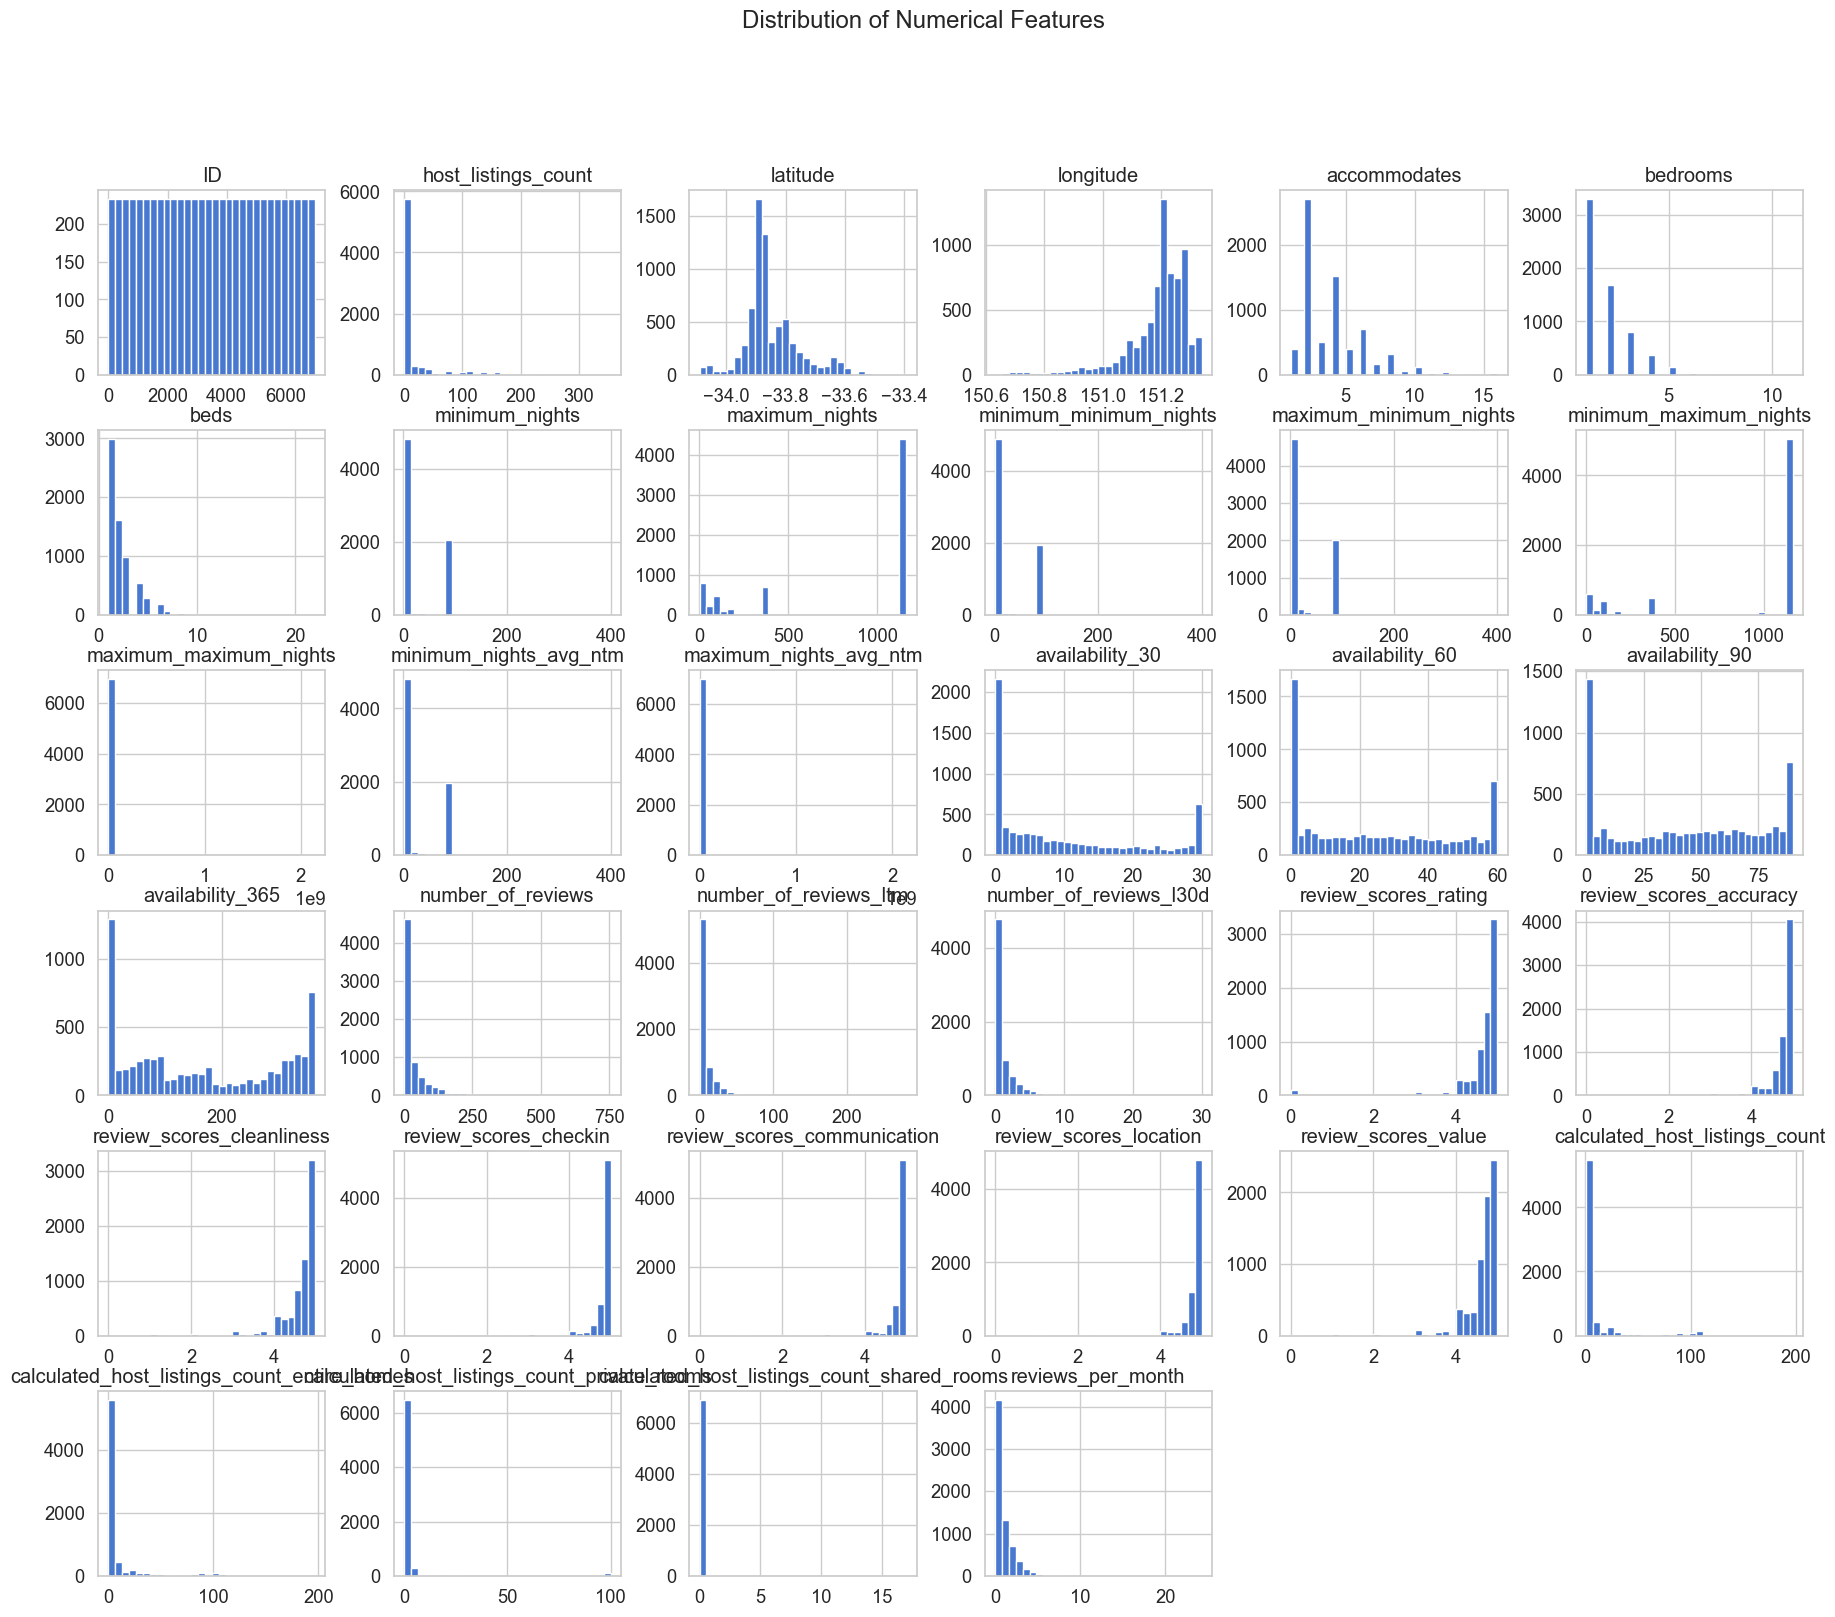

In [26]:
# 4️⃣ Distribution of Numeric Features
df_train[num_cols].hist(figsize=(22, 18), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

The numerical feature distribution figure provides a broad overview of the dataset's characteristics. Here are some general insights through it: 
- The dataset is **diverse**, containing both individual and professional hosts.
- Most listings cater to **short-term stays**, but some outliers allow extremely long stays.
- Some listings might be **inactive or rarely booked**, as seen in low review counts and near-zero availability.
- **Feature scaling and outlier handling** might be necessary for better modeling.

### 5. Correlation Analysis (Only for Numeric Features)

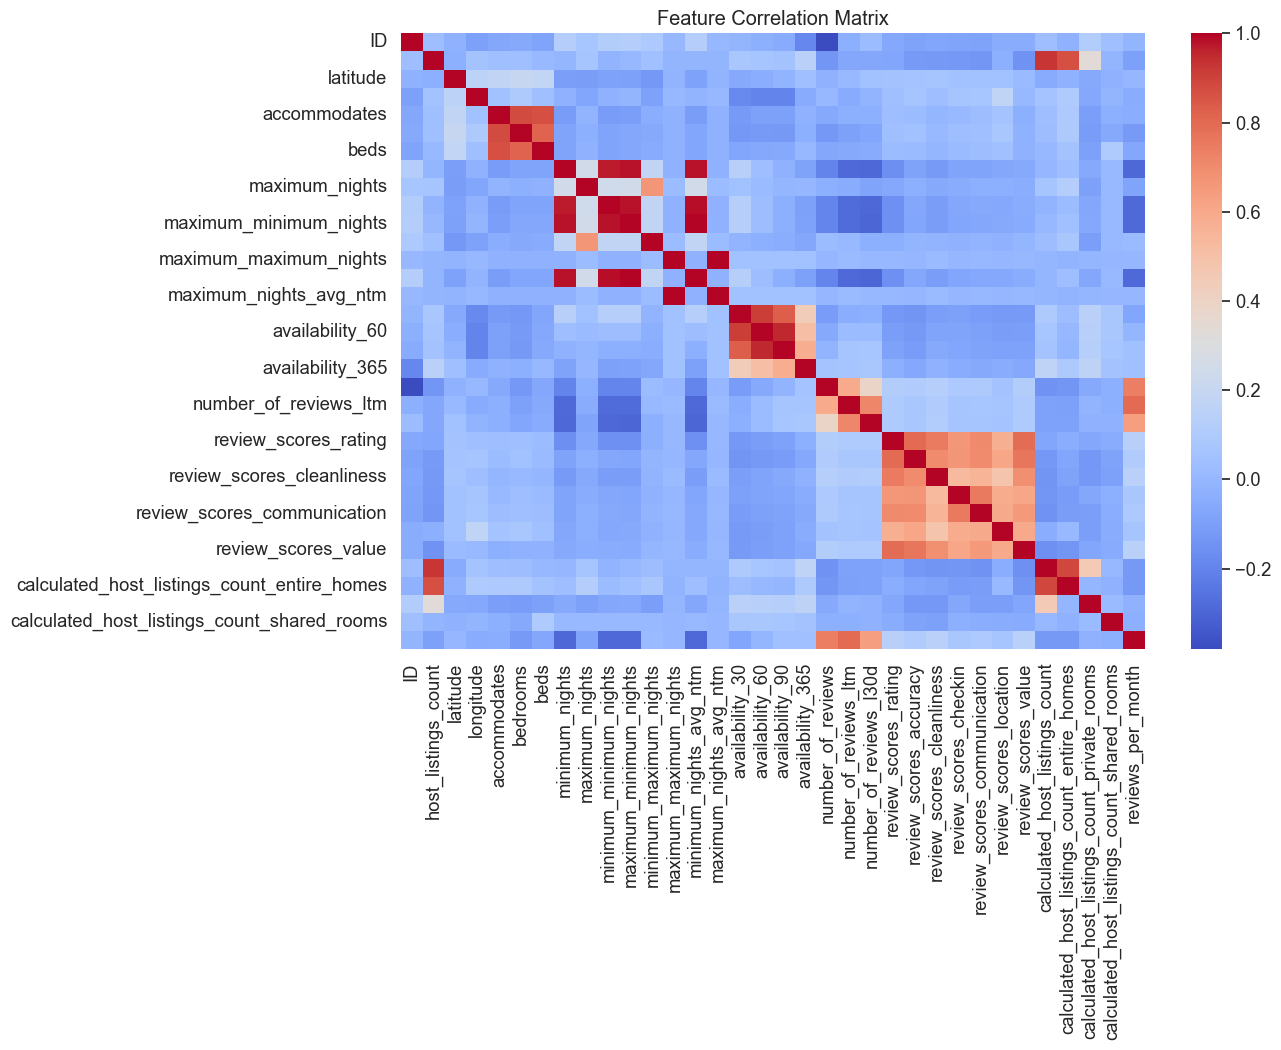

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

The matrix shows a mix of strong, moderate, and weak correlations, with some clusters of highly related features.
1. Strong Relationships

- Features related to accommodation size (beds, accommodates) are closely linked, which is expected as larger properties generally accommodate more guests.
- Availability features (availability_30, availability_60, availability_365) show strong interrelationships, indicating that properties with availability in the short term are also likely to be available long term.
- Review scores (cleanliness, communication, value, etc.) tend to be correlated, meaning well-rated properties generally score high across multiple categories.

2. Moderate to Weak Correlations

- Number of Reviews & Reviews per Month: Listings with more total reviews tend to receive more recent reviews, but the correlation isn’t perfect, likely due to seasonal demand.
- Host Listings Count & Entire Homes/Shared Rooms: More listings under a single host might indicate professional property managers rather than individual hosts.

3. Weak or No Correlation

- Some variables, such as latitude and longitude, show little correlation with most other features, suggesting location does not have a direct impact on numerical attributes.
- Review scores do not strongly correlate with availability, meaning guest satisfaction is independent of how frequently a listing is available.

4. Feature Selection Considerations
- Highly correlated variables may be redundant and can be removed or transformed to avoid multicollinearity in modeling.
- Weakly correlated features should be explored further to check if non-linear relationships exist, which could be captured through advanced techniques like polynomial transformations or clustering.

### 6. Check Unique Values in Categorical Columns

In [28]:
# Define categorical columns only
cat_cols = df_train.select_dtypes(include=["object"]).columns

In [29]:
print("\n📌 Unique Values in Categorical Columns:")
for col in cat_cols:
    print(f"{col}: {df_train[col].nunique()} unique values")
    print(df_train[col].value_counts().head(5))  # Show top 5 most common values
    print("-" * 50)


📌 Unique Values in Categorical Columns:
name: 6908 unique values
name
Sydney CBD near Train UTS DarlingHar&ICC&Chinatown    8
Fully Self Contained Studio Apartment.                6
Sydney CBD Near Train UTS DarlingHar&ICC&Chinatown    5
Two Bedroom Apartment                                 5
Close to Sydney                                       4
Name: count, dtype: int64
--------------------------------------------------
description: 6719 unique values
description
☣☣☣NOT ACCEPTING/ NOT SUITABLE FOR ISOLATION OR QUARANTINE & PROOF OF VACCINATION REQUIRED. DUE TO THE CURRENT PANDEMIC OUTBREAK OF COVID-19, WE ARE CURRENTLY NOT ACCEPTING ANY GUESTS THAT ARE DISPLAYING ANY SYMPTOMS OF FLU/COLD/FEVER/COUGH/SHORTNESS OF BREATH or BEEN IN CONTACT WITH CONFIRMED CASES. ONCE THE COVID-19 SITUATION CLEARS UP. PLEASE DO NOT HESITATE TO BOOK WITH US. WE APOLOGIZE FOR THE CURRENT SITUATION AND THANK YOU FOR YOUR UNDERSTANDING!!!☣☣☣<br /><br />Looking for an affordable place to stay while explorin

By checking unique values in these 3 text-based columns, we can have some useful insights for the data cleaning task: 

1. High Uniqueness in Certain Columns
- The `name` column has 6,908 unique values, meaning almost every listing has a different name. This suggests that the feature might not be useful for analysis since it lacks generalization.
- The `description` column also has 6,719 unique values, indicating highly diverse content. This could be useful for text analysis or NLP but is unlikely to be helpful as a direct categorical feature.
- `Neighborhood_overview` has 4,466 unique values, showing that descriptions vary widely even within the same location.

2. Some Categories Have Limited Unique Values
- Some categorical features, such as **apartment types** ("Fully Self Contained Studio Apartment," "Two Bedroom Apartment"), have repeated values, which can be used for grouping or clustering similar listings.
- The repeated **COVID-19 disclaimer** in descriptions suggests that some listings might have outdated or unnecessary information.

3. Implications for Data Processing
- **High-cardinality categorical variables** (like name, description) should be either removed or processed using _text-based techniques_ (e.g., NLP, keyword extraction).
- **More structured categorical features** (like apartment type) can be useful for categorization, filtering, or one-hot encoding in modeling.
- **Cleaning descriptions** to remove redundant text (e.g., COVID-19 notices) may improve readability and analysis.